# SEAMLESS COMPLAINTS RESOLUTION.

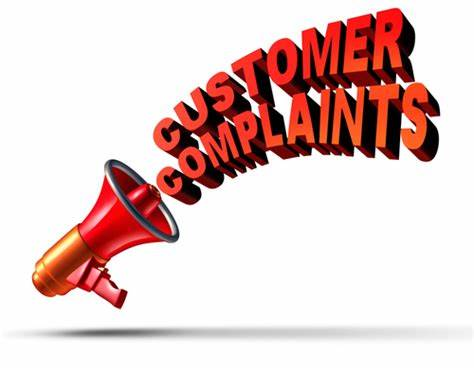

In [73]:
from IPython.display import Image
Image(filename='complaints.jpg', width=800, height=500)

# Table of Content

<a id="cont"></a>

<a href=#one>1. Objectives</a> 

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Data Collection</a>

<a href=#four>4. Exploratory data Analysis</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. modeling</a>

<a href=#seven>7. Model review</a>


<a id="one"></a>
# 1. Objectives
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

In the fast-paced and interconnected world of modern business, customer feedback plays a crucial role in shaping the success of any organization. Companies across various industries receive a multitude of complaints from their customers daily. Effectively handling these complaints and routing them to the appropriate departments for timely resolution is essential for maintaining customer satisfaction and streamlining internal operations.

To address this challenge, I am embarking on an innovative project to develop a cutting-edge Natural Language Processing (NLP) model using  Consumer Financial Protection Bureau (CFPB)  data downloaded on kaggle. CFPB is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers.

 The primary objective of this model is to read and comprehend natural language in customer complaints, enabling us to automatically route each complaint to the right department or team for efficient and tailored resolution.

<a id="two"></a>
# 2.   Importing Libraries
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

In [52]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px
import time
from wordcloud import WordCloud
from collections import Counter

#Libraries for Natural Language processing
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import urllib
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Libraries for data engineering and modeling
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
Random_state=42 
import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



<a id="three"></a>
# 3. Data Collection
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

In [53]:
#Reading the csv
df=pd.read_csv('complaints_processed.csv')
#Viewing the head
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


**Observation**

- The dataframe has three features namely unnamed: 0, product and narrative. It is important to also note that the unnamed column consist of the data that wont be necessary for the project. 

<a id="four"></a>
# 4. Exploratory Data Analysis
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

**4.1 More Information on the data**

In [54]:
print('Checking number of observations and datatype')
print()
print(df.info())
print()
print('Checking for nulls')
print()
print(df.isnull().sum())

Checking number of observations and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB
None

Checking for nulls

Unnamed: 0     0
product        0
narrative     10
dtype: int64


**Observation:**
    
- The data consist of 162421 entries, with the narrative column having 10 missing observations.
- The two features namely Product and narrative datatypes are object and the third one datatype is integers.

**4.2 The pie chart showing the distribution of consumer complaints**

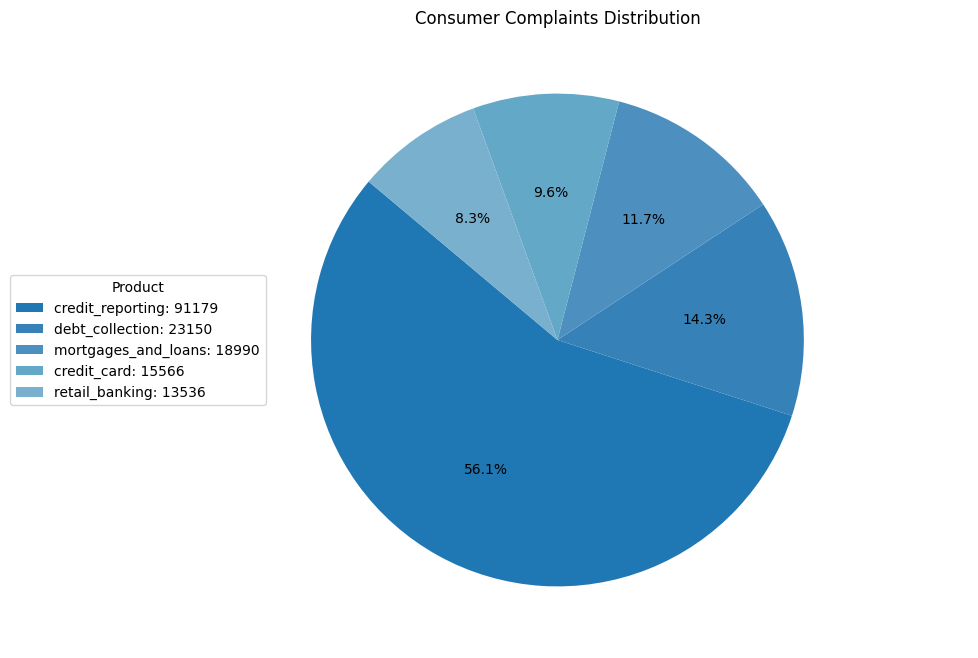

In [55]:
# Get the value counts for the 'product' column
product_counts = df['product'].value_counts()

# Set custom shades of blue
colors = ['#1f77b4', '#3581b8', '#4d8fbf', '#63a8c6', '#79b0cd']

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional)
wedges, texts, _ = plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the text in the center of each slice with the exact count
for text in texts:
    text.set_color('white')  # Setting text color to white
    text.set_fontsize(12)  # Setting text font size
    text.set_fontweight('bold')  # Setting text font weight

# Adding the count as legend on the left side
legend_labels = [f'{product}: {count}' for product, count in zip(product_counts.index, product_counts.values)]
plt.legend(wedges, legend_labels, title='Product', loc='center left', bbox_to_anchor=(-0.4, 0.5))

# Title
plt.title('Consumer Complaints Distribution')

# Displaying the plot
plt.show()

**Observation:**

- Consumer complaints are directed to five departments namely: credit reporting, debt collection, mortgages & loans, credit cards and retail banking. 
- Most of the consumer complaints are directed to credit reporting departing, it accounts to more than 50% of the consumer complaints. The class imbalance will be handled during feature engineering to ensure the robustness of the model. 
- Credit reporting is a department that gather and maintain information about individuals' credit activities and creditworthiness. 

**4.3 The bar graph of the distribution of word counts for each department**

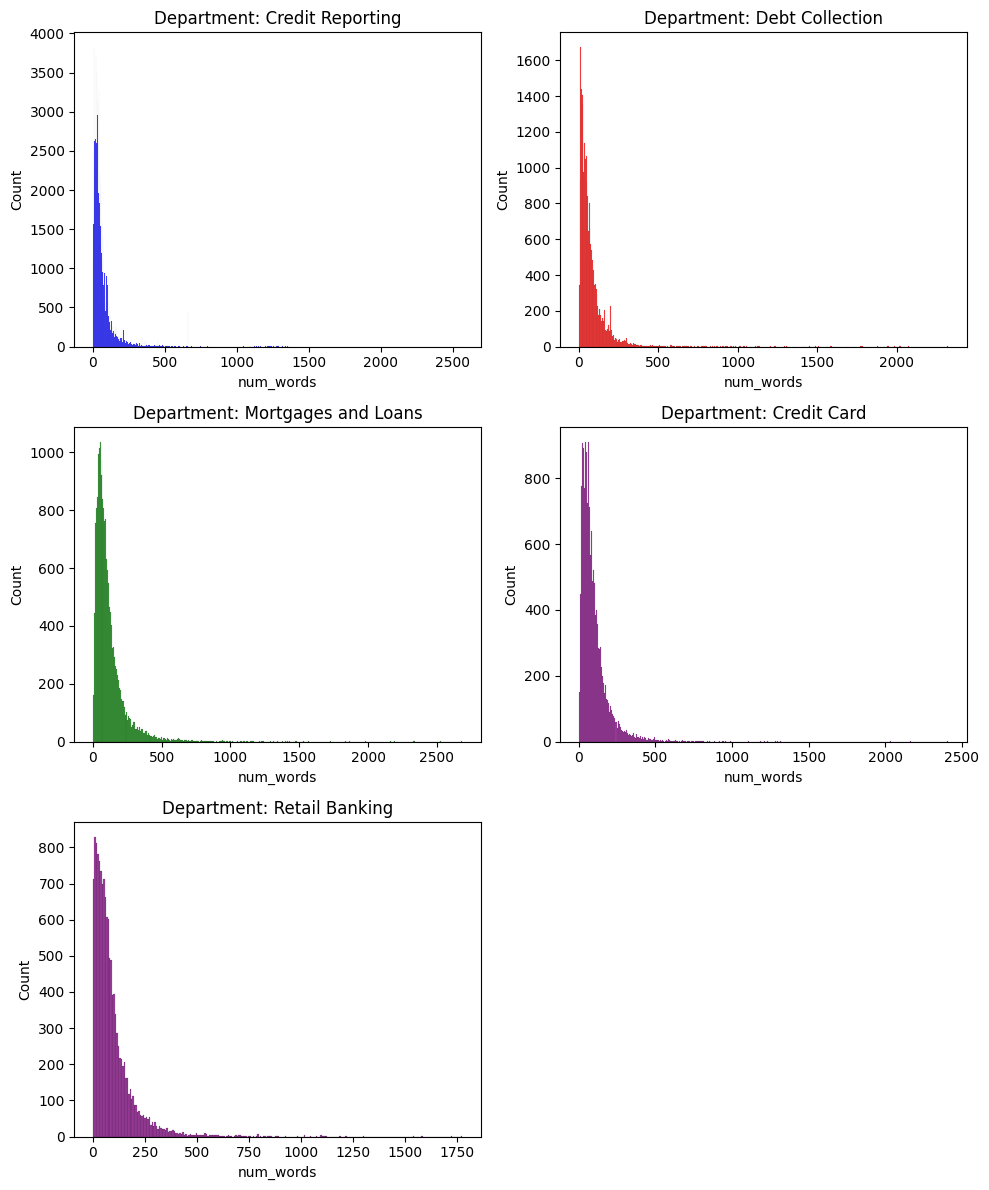

In [56]:
#Changing the narrative column to string
df['narrative']=df['narrative'].astype(str)

#Creating a number of Words feature
df['num_words']=df['narrative'].apply(lambda x:len(nltk.word_tokenize(x)))

# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot histogram for  'credict_reporting'
sns.histplot(df[df['product'] == 'credit_reporting']['num_words'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Department: Credit Reporting')

# Plotting histogram for 'debt_collection'
sns.histplot(df[df['product'] == 'debt_collection']['num_words'], ax=axes[0, 1], color='red')
axes[0, 1].set_title('Department: Debt Collection')

# Plotting histogram for  'mortgages_and_loans'
sns.histplot(df[df['product'] == 'mortgages_and_loans']['num_words'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Department: Mortgages and Loans')

# Plotting histogram for'credit_card'
sns.histplot(df[df['product'] == 'credit_card']['num_words'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Department: Credit Card')

# Plotting histogram for 'retail_banking'
sns.histplot(df[df['product'] == 'retail_banking']['num_words'], ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Department: Retail Banking')

# An empty subplot for spacing
axes[2, 1].axis('off')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showingthe subplots
plt.show()


**Observation:**

- The graph above illustrates that the word counts of the consumer complaints from all the department are right skewed. That is, most of the consumer complaints have very words counts.
- It is important to note that there are outliers; that is, some consumers get into great depth when sending a consumer complaints. 

**4.4 Removing Stopwords**

In [57]:
#A function of removing stopwords
def remove_stopwords(text):
    """
    Remove stopwords from the given text.

    Args:
        text (str): The input text from which stopwords are to be removed.

    Returns:
        str: The text with stopwords removed.
    """
    stop_words = set(stopwords.words('english'))  # Set of stopwords in English
    tokens = text.split()                         # Splitting the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filtering out stopwords
    return ' '.join(filtered_tokens)              # Joining the filtered tokens back into a text

#Removing stop words from training data
df['updated_message'] = df['narrative'].apply(remove_stopwords)
#Viewing the changes on the training dataframe
df.head()

,Unnamed: 0,product,narrative,num_words,updated_message
0,0,credit_card,purchase order day shipping amount receive pro...,230,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...,132,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,173,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...,131,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...,123,payment history missing credit report made mis...


**4.5 Removing Punctuations**


In [58]:
#A function of removing puntuationa marks
def remove_punctuation(post):
    """
    Remove punctuation marks from the given post.

    Args:
        post (str): The input post from which punctuation marks are to be removed.

    Returns:
        str: The post with punctuation marks removed.
    """
    return ''.join([l for l in post if l not in string.punctuation])

# Create and Check if a new column contains messages with no punctuations
df['updated_message'] = df['updated_message'].apply(remove_punctuation).str.lower() #Words converted to lower case
#Viewing changes made on the training daraframe
df.head()

,Unnamed: 0,product,narrative,num_words,updated_message
0,0,credit_card,purchase order day shipping amount receive pro...,230,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...,132,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,173,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...,131,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...,123,payment history missing credit report made mis...


**4.6 Masking each department** 

In [59]:
#Credit Reporting
credit = df.loc[df['product'] == 'credit_reporting', 'updated_message']
#Debt Collection
debt = df.loc[df['product'] == 'debt_collection', 'updated_message']
#Mortgages and loans
mortgages = df.loc[df['product'] == 'mortgages_and_loans', 'updated_message']
#Credit cards
cards = df.loc[df['product'] == 'credit_card', 'updated_message']
#Retail banking
retail = df.loc[df['product'] == 'retail_banking', 'updated_message']

**4.7  Word clouds for the five departments**

Category: credit reporting, Number of Words: 6178595
Category: debt collection, Number of Words: 1822791
Category: Mortgages and loans, Number of Words: 2230737
Category: credit cards, Number of Words: 1527748
Category: retail banking, Number of Words: 1266790


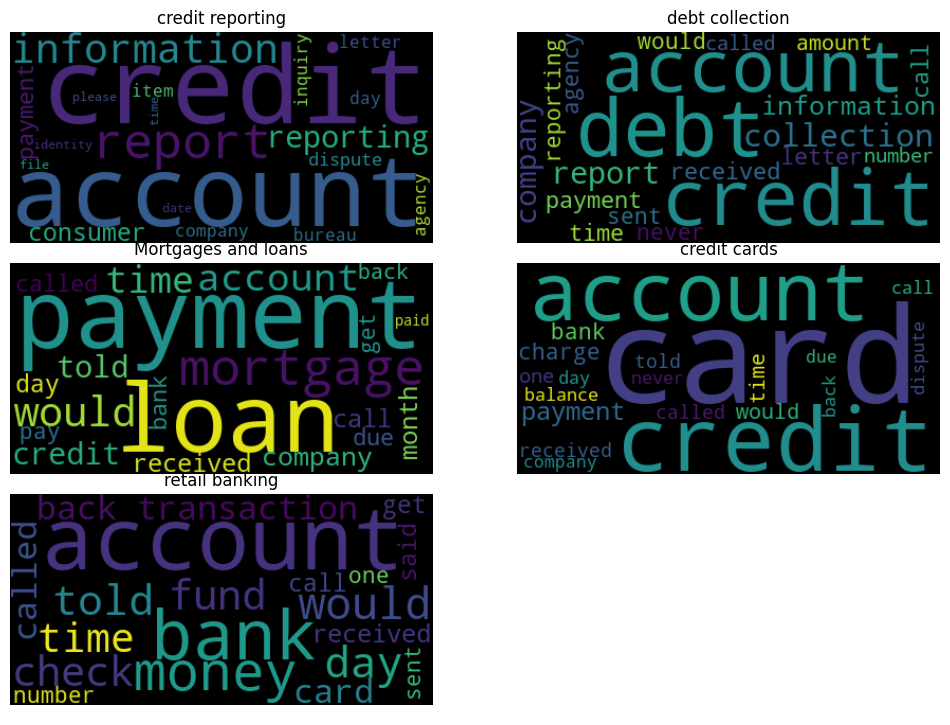

In [60]:
# Defining the categories and their respective texts
categories = ['credit reporting', 'debt collection', 'Mortgages and loans', 'credit cards', 'retail banking']
texts = [credit, debt, mortgages, cards, retail]

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
fig.subplots_adjust(hspace=0)  # Adjusting the hspace parameter to remove vertical spacing

# Generating word clouds for each category and plot them
for i, ax in enumerate(axs.flat):
    if i < len(categories):  # Ensure we only use the first five categories
        # Calculating word distribution
        text = ' '.join(texts[i])
        words = text.split()
        print(f"Category: {categories[i]}, Number of Words: {len(words)}")  # Add this line to check the number of words

        # Generating word cloud
        wordcloud = WordCloud(max_words=20)
        wordcloud.generate_from_frequencies(Counter(words))

        # Ploting  the word cloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(categories[i])
    else:
        ax.axis('off')

# Showing the subplots
plt.show()

**Observation:**
    
- Credit Reporting Complaints:
The most common words in complaints related to credit reporting are "Credit," "account," "reporting," "report," and "information." This suggests that consumers are often expressing concerns or frustrations related to their credit reports, accounts, and the accuracy or handling of credit-related information.

- Debt Collection Complaints:
The most common words in complaints related to debt collection are "debt," "credit," "account," "collection," and "report." This indicates that consumers are frequently expressing issues with the collection of debts, interactions with debt collectors, and how these activities might impact their credit report.

- Mortgage and Loan Complaints:
The most common words in complaints related to mortgages and loans are "Loan," "payment," "Mortgage," "credit," and "account." This suggests that consumers often have complaints concerning loan payments, mortgage-related issues, and credit aspects associated with loans.

- Credit Card Complaints:
The most common words in complaints related to credit cards are "Credit," "Card," "account," "payment," and "charge." This indicates that consumers commonly express concerns regarding credit card transactions, account management, and charges they may have incurred.

- Retail Banking Complaints:
The most common words in complaints related to retail banking are "account," "bank," "money," "fund," and "check." This suggests that consumers frequently express issues with their bank accounts, money transactions, funds management, and perhaps problems with check-related services.

<a id="five"></a>
# 5. Data Engineering 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

**5.1 Data Resampling**

In [61]:
#Credit Reporting
credit = df[df['product'] == 'credit_reporting']
#Debt Collection
debt = df[df['product'] == 'debt_collection']
#Mortgages and loans
mortgages = df[df['product'] == 'mortgages_and_loans']
#Credit cards
cards = df[df['product'] == 'credit_card']
#Retail banking
retail = df[df['product'] == 'retail_banking']



Credit= resample(credit,
                    replace=False, 
                    n_samples=13000, 
                    random_state=42)
Debt = resample(debt,
                   replace=False, 
                   n_samples=13000, 
                 random_state=42)
Mortgages= resample(mortgages,
                          replace=False,
                          n_samples=13000, 
                          random_state=42)
Cards= resample(cards,
             replace=False, 
            n_samples=13000,
            random_state=42)
Retail= resample(retail,
             replace=False, 
            n_samples=13000, 
            random_state=42)

df = pd.concat([Credit, Debt, Mortgages, Cards, Retail])

**5.2 Lemmatization**

In [62]:
def lemmatize_text(text):
    # Initializing the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokenizing the text into individual words
    words = nltk.word_tokenize(text)
    
    # Lemmatize each word and join them back into a sentence
    lemmatized_text = ' '.join(lemmatizer.lemmatize(word) for word in words)
    
    return lemmatized_text

#applying the function on the updated text
df['lemmatized_message'] = df['updated_message'].apply(lemmatize_text)

**5.3 Vectorization**

In [70]:
#Building the vectorizor
tf = CountVectorizer(
    max_features=500,        
    ngram_range=(1, 4),
    stop_words='english',    
    min_df=2,                
    max_df=0.95,             
    lowercase=True)
#Transforming the data with the vectorizier
X = tf.fit_transform(df['lemmatized_message']).toarray()

**5.4 Defining the response Variable**

In [64]:
# Building the label encoder
label_encoder = LabelEncoder()
#fitting and transforming the data
y = label_encoder.fit_transform(df['product'])
#Reshaping the response data
y=y.reshape(-1, 1)
y = np.ravel(y)

**5.5 Spliting the data**

In [65]:
#Spliting the data
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)

<a id="six"></a>
# 6. Data Modeling 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>b

**6.1 Building the model**

In [66]:
#Logistic Regression
lr=LogisticRegression(C=0.1)
#Support vector Machine
svc=SVC(kernel='rbf') 
#Random forest Classifier
rfc=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
#Decision Tree Classifier
dtc=DecisionTreeClassifier (max_depth=10, random_state=42)

**6.2 Training the model**

In [67]:
#Logistic Regression
lr.fit(X_train, y_train)
#Support vector Machine
svc.fit(X_train, y_train)
#Random forest Classifier
rfc.fit(X_train, y_train)
#Decision Tree Classifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

<a id="seven"></a>
# 7 Models Review 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

**7.1 Comparision of the accuracy score**

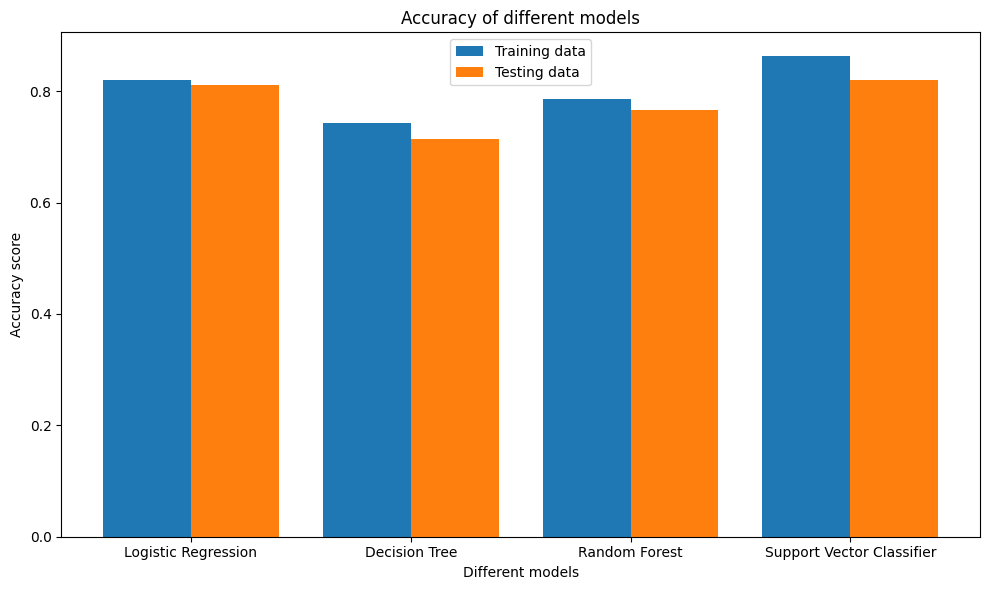

In [68]:
#Accuracy of logistic regression
Lr_train=accuracy_score(y_train, lr.predict(X_train))
Lr_test=accuracy_score(y_test, lr.predict(X_test))
#Accuracy of Decision Tree Classifier
Dt_train=accuracy_score(y_train, dtc.predict(X_train))
Dt_test=accuracy_score(y_test, dtc.predict(X_test))
#Accuracy of Random Forest Classifier
Rf_train=accuracy_score(y_train, rfc.predict(X_train))
Rf_test=accuracy_score(y_test, rfc.predict(X_test))
#Accuracy of Support Vector Classifier
svc_train=accuracy_score(y_train, svc.predict(X_train))
svc_test=accuracy_score(y_test, svc.predict(X_test))

categories = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier']
training  = [Lr_train, Dt_train, Rf_train, svc_train]  # The accuracy on the training data
testing= [Lr_test, Dt_test, Rf_test, svc_test] #the accuracy on the testing data

# Setting the positions for the bars
x = list(range(len(categories)))
x1 = [pos - 0.2 for pos in x] 
x2 = [pos + 0.2 for pos in x]  

# Creating figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Plottng the bar graph
ax.bar(x1, training, width=0.4, align='center', label='Training data')
ax.bar(x2, testing, width=0.4, align='center',label='Testing data')

# Setting labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Different models')
ax.set_ylabel('Accuracy score')
ax.set_title('Accuracy of different models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

**7.2 Prediction of message accross five departments**

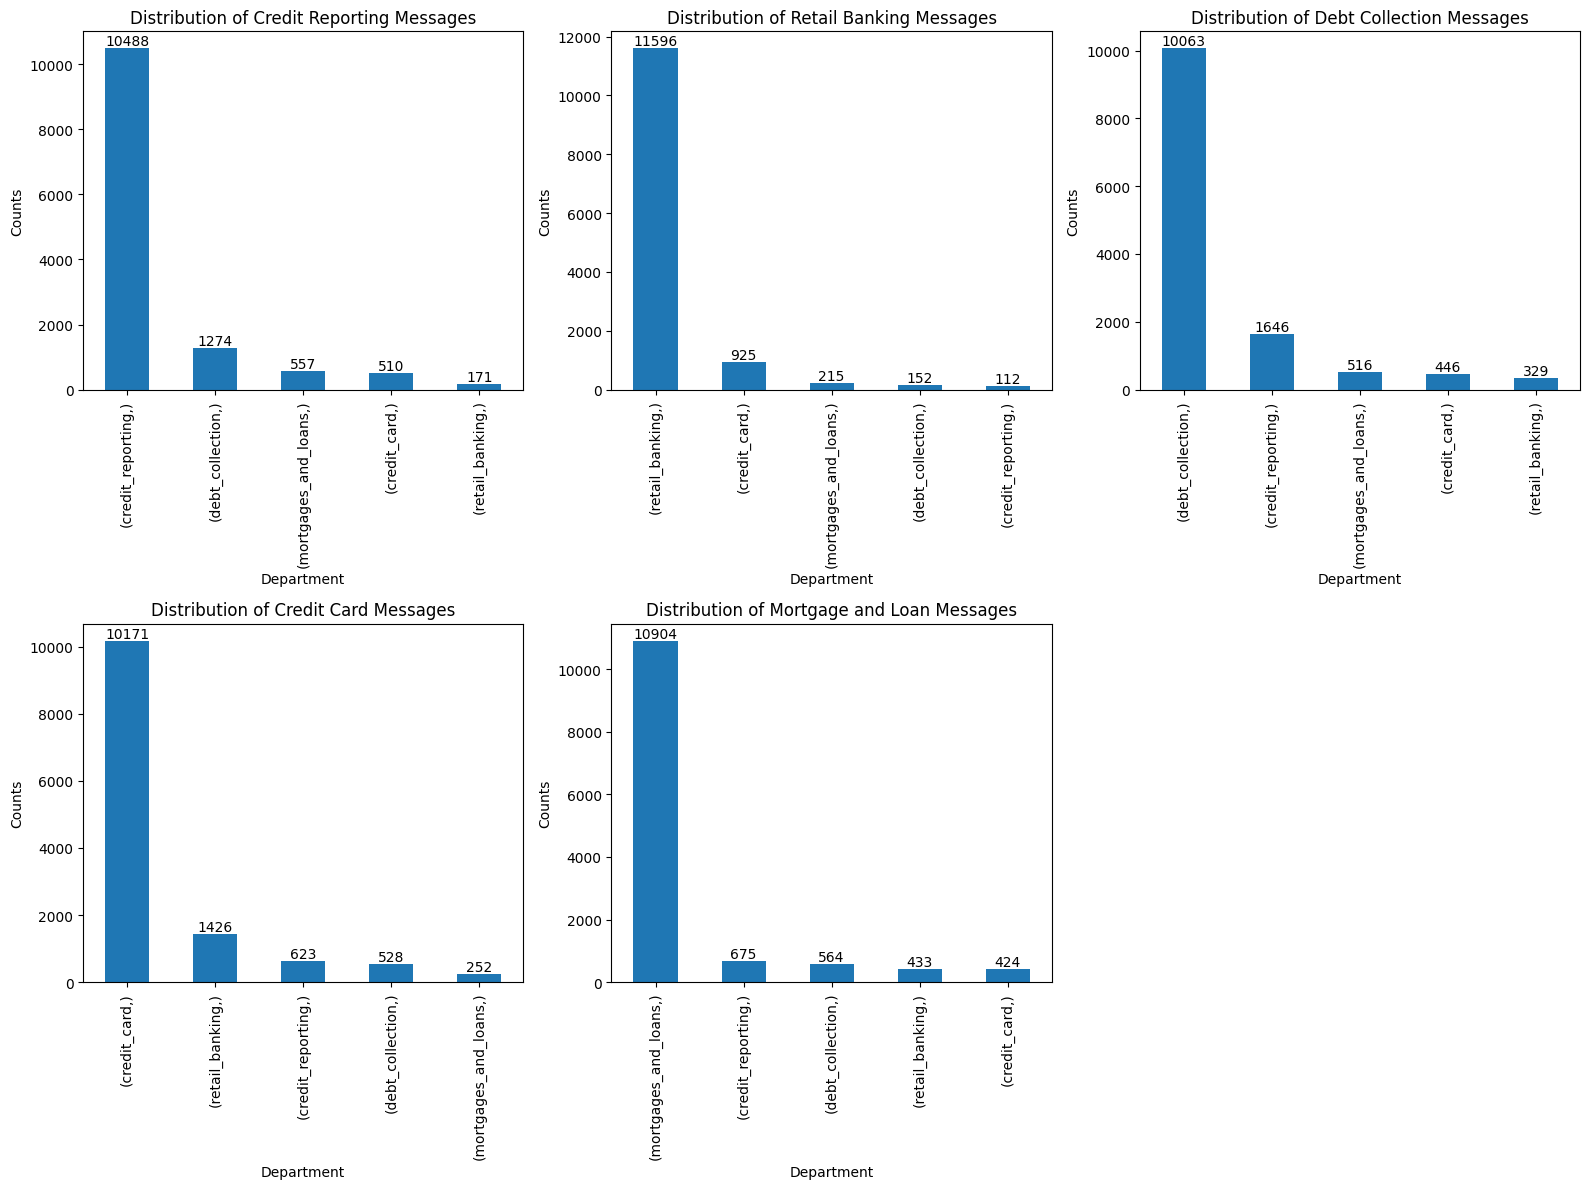

<Figure size 640x480 with 0 Axes>

In [69]:
#Categorizing the Message
cred=Credit[['updated_message']]
debt=Debt[['updated_message']]
mort=Mortgages[['updated_message']]
card=Cards[['updated_message']]
retl=Retail[['updated_message']]

#applying the Lemmatization function on the updated text
cred['lemmatized_message'] = cred['updated_message'].apply(lemmatize_text)
debt['lemmatized_message'] =debt['updated_message'].apply(lemmatize_text)
mort['lemmatized_message'] = mort['updated_message'].apply(lemmatize_text)
card['lemmatized_message'] = card['updated_message'].apply(lemmatize_text)
retl['lemmatized_message'] = retl['updated_message'].apply(lemmatize_text)

#Vectorising the text
Xcre=tf.transform(cred['lemmatized_message']).toarray()
Xdeb=tf.transform(debt['lemmatized_message']).toarray()
Xmor=tf.transform(mort['lemmatized_message']).toarray()
Xcar=tf.transform(card['lemmatized_message']).toarray()
Xret=tf.transform(retl['lemmatized_message']).toarray()

#Predicting using the logistic regression
Pcre=lr.predict(Xcre)
Pdeb=lr.predict(Xdeb)
Pmor=lr.predict(Xmor)
Pcar=lr.predict(Xcar)
Pret=lr.predict(Xret)

#Transforming the labels into original format
p_cre=pd.DataFrame(label_encoder.inverse_transform(Pcre))
p_deb=pd.DataFrame(label_encoder.inverse_transform(Pdeb))
p_mor=pd.DataFrame(label_encoder.inverse_transform(Pmor))
p_car=pd.DataFrame(label_encoder.inverse_transform(Pcar))
p_ret=pd.DataFrame(label_encoder.inverse_transform(Pret))

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# Define a function to add counts on top of the bars
def add_counts_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Plot the value counts as horizontal bar charts
p_cre_counts = p_cre.value_counts()
p_cre_counts.plot(kind='bar', ax=axes[0, 0], xlabel='Department', ylabel='Counts')
add_counts_on_bars(axes[0, 0])

p_ret_counts = p_ret.value_counts()
p_ret_counts.plot(kind='bar', ax=axes[0, 1], xlabel='Department', ylabel='Counts')
add_counts_on_bars(axes[0, 1])

p_deb_counts = p_deb.value_counts()
p_deb_counts.plot(kind='bar', ax=axes[0, 2], xlabel='Department', ylabel='Counts')
add_counts_on_bars(axes[0, 2])

p_car_counts = p_car.value_counts()
p_car_counts.plot(kind='bar', ax=axes[1, 0], xlabel='Department', ylabel='Counts')
add_counts_on_bars(axes[1, 0])

p_mor_counts = p_mor.value_counts()
p_mor_counts.plot(kind='bar', ax=axes[1, 1], xlabel='Department', ylabel='Counts')
add_counts_on_bars(axes[1, 1])

# Remove labels for bar graph slices
axes[1, 2].set_ylabel('')

# Add titles to subplots
axes[0, 0].set_title('Distribution of Credit Reporting Messages')
axes[0, 1].set_title('Distribution of Retail Banking Messages')
axes[0, 2].set_title('Distribution of Debt Collection Messages')
axes[1, 0].set_title('Distribution of Credit Card Messages')
axes[1, 1].set_title('Distribution of Mortgage and Loan Messages')
axes[1, 2].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Observation**

- Out of 13000 messages of each department, more than 10000  messages were correctly directed to the appropriate department. Remarkably, the Retail Banking department achieved the highest accuracy in receiving correctly predicted messages, demonstrating the effectiveness of the classification system. Conversely, the Debt Collection department received the fewest correctly predicted messages, indicating room for improvement in message classification.
- Credit Reporting misclassification: Within the Credit Reporting department, a notable trend emerges as most of the incorrectly predicted messages are directed towards the Debt Collection department. 
- Debt Collection message Misclassifications: Among Debt Collection messages that were inaccurately classified, a significant portion of them were mistakenly directed to the Credit Collection department. 
- Credit Card message Misclassifications: In the Credit Card department, instances of misclassification primarily led to messages being directed to the Retail Banking department. 
- Retail Banking message Misclassifications: Similarly, within the Retail Banking department, a majority of misclassified messages ended up being directed to the Credit Card department. 
